<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-Deep_Learning/03-multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

# Define parameters: W - weight , b - bias
# requires_grad: backpropagation을 허용할 것인가.
W = torch.zeros([4,1], requires_grad = True)
b = torch.zeros(1, requires_grad = True)

x_train = torch.FloatTensor([[3.8, 700, 80, 50],
                             [3.2, 650, 90, 30],
                             [3.7, 820, 70, 40],
                             [4.2, 830, 50, 70],
                             [2.6, 550, 90, 60],
                             [3.4, 910, 30, 40],
                             [4.1, 990, 70, 20],
                             [3.3, 870, 60, 60],
                             [3.9, 650, 80, 50]])
y_train = torch.FloatTensor([[85],[80],[78],[87],[85],[70],[81],[88],[84]])

print(x_train.shape, y_train.shape, W.shape)

optimizer = optim.Adam([W, b], lr = 0.05)
num_epochs = 1000
history = []

print('< Before Train >')
print('W = ', W)
print('b =', b)
for epoch in range(num_epochs):
  hypothesis = x_train.matmul(W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  history.append(cost.item())

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 50 == 0:
    print('Epoch: %d , Cost: %f' %(epoch, cost))


print('< After Train >')
print('W =', W)
print('b =', b)

new_input = torch.FloatTensor([3.3, 700, 77, 84])
predict = new_input.matmul(W) + b
print('My final predict socre is estimated as %f' %(predict))

torch.Size([9, 4]) torch.Size([9, 1]) torch.Size([4, 1])
< Before Train >
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 50 , Cost: 23.443331
Epoch: 100 , Cost: 2.536440
Epoch: 150 , Cost: 2.370576
Epoch: 200 , Cost: 2.359143
Epoch: 250 , Cost: 2.354346
Epoch: 300 , Cost: 2.349288
Epoch: 350 , Cost: 2.343868
Epoch: 400 , Cost: 2.338124
Epoch: 450 , Cost: 2.332109
Epoch: 500 , Cost: 2.325862
Epoch: 550 , Cost: 2.319415
Epoch: 600 , Cost: 2.312817
Epoch: 650 , Cost: 2.306113
Epoch: 700 , Cost: 2.299312
Epoch: 750 , Cost: 2.292455
Epoch: 800 , Cost: 2.285575
Epoch: 850 , Cost: 2.278705
Epoch: 900 , Cost: 2.271848
Epoch: 950 , Cost: 2.265046
< After Train >
W = tensor([[0.4950],
        [0.0424],
        [0.4045],
        [0.4103]], requires_grad=True)
b = tensor([0.3952], requires_grad=True)
My final predict socre is estimated as 97.286110


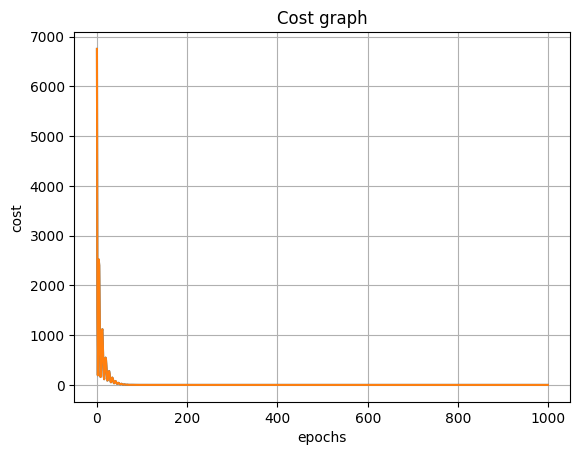

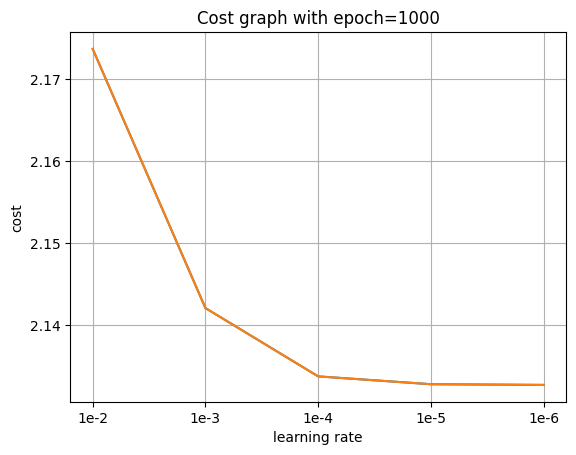

In [2]:
num_epochs = 1000
results = []

def draw_plot(data, op):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.plot(data)
  if op == 0:
    ax.plot(history)
    plt.title('Cost graph')
    plt.xlabel('epochs') # x축 제목
  else:
    ax.plot(results)
    plt.title('Cost graph with epoch=1000')
    plt.xlabel('learning rate') # x축 제목
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['1e-2', '1e-3', '1e-4', '1e-5', '1e-6'])
  plt.ylabel('cost') # y축 제목
  ax.grid()
  plt.show()


draw_plot(history, 0)

def learning(optimizer):
  for epoch in range(num_epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    history.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  results.append(cost.item())

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
for i in learning_rates:
  learning(optim.Adam([W, b], lr = i))

draw_plot(results, 1)


tensor([3.8000, 3.2000, 3.7000, 4.2000, 2.6000, 3.4000, 4.1000, 3.3000, 3.9000])
tensor([80., 90., 70., 50., 90., 30., 70., 60., 80.])
tensor([85., 80., 78., 87., 85., 70., 81., 88., 84.])


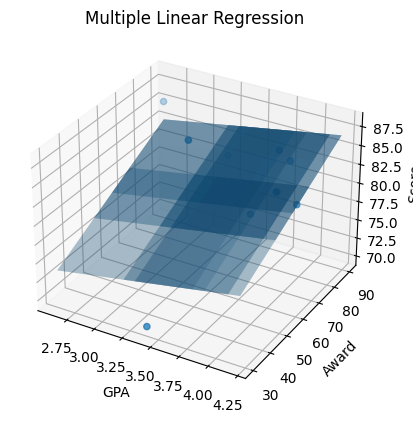

In [33]:
gpa = x_train[:, 0]
award = x_train[:, 2]
z = y_train.squeeze()
print(gpa)
print(award)
print(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gpa, award, z)

A = np.vstack([gpa, award, np.ones_like(gpa)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(gpa, award)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.1)


# Add labels and title
ax.set_xlabel('GPA')
ax.set_ylabel('Award')
ax.set_zlabel('Score')
plt.title('Multiple Linear Regression')
plt.show()